In [10]:
import pandas as pd
import numpy as np

df = pd.read_csv("dataset/new-dataset.csv")
df.head()

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheelbase,length,...,horsepower,peak-rpm,city-L/100Km,highway-L/100Km,price,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,11.190476,8.703704,13495.0,Low,False,True,True,False
1,1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,11.190476,8.703704,16500.0,Low,False,True,True,False
2,2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,154,5000.0,12.368421,9.038462,16500.0,Medium,False,True,True,False
3,3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,...,102,5500.0,9.791667,7.833333,13950.0,Low,False,True,True,False
4,4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,...,115,5500.0,13.055556,10.681818,17450.0,Low,False,True,True,False


# Visualizacao do dataset
E removed a coluna 'unnamed'

In [11]:
df=df.drop(df.columns[0], axis=1)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheelbase,length,width,...,horsepower,peak-rpm,city-L/100Km,highway-L/100Km,price,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,11.190476,8.703704,13495.0,Low,False,True,True,False
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,11.190476,8.703704,16500.0,Low,False,True,True,False
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,154,5000.0,12.368421,9.038462,16500.0,Medium,False,True,True,False
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,102,5500.0,9.791667,7.833333,13950.0,Low,False,True,True,False
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,115,5500.0,13.055556,10.681818,17450.0,Low,False,True,True,False


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [14]:
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheelbase            float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-L/100Km         float64
highway-L/100Km      float64
price                float64
horsepower-binned     object
fuel-type-diesel        bool
fuel-type-gas           bool
aspiration-std          bool
aspiration-turbo        bool
dtype: object


# Correlation entre vars int64 e float64

## Funcao 'corr'

In [18]:
df.corr(numeric_only=True)

,symboling,normalized-losses,wheelbase,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100Km,highway-L/100Km,price,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075810,0.279740,0.066171,-0.029807,-0.082391,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217300,0.239543,0.238567,0.181189,0.133999,-0.101546,0.101546,0.006911,-0.006911
wheelbase,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371178,-0.360305,0.476153,0.577576,0.584642,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579795,-0.285970,0.657373,0.707108,0.690628,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615056,-0.245800,0.673363,0.736728,0.751265,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087001,-0.309974,0.003811,0.084301,0.135486,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757981,-0.279361,0.785353,0.836921,0.834415,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822668,-0.256733,0.745059,0.783465,0.872335,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566903,-0.267392,0.554610,0.559112,0.543155,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098128,-0.063561,0.036133,0.047089,0.082269,0.241064,-0.241064,-0.218233,0.218233


In [17]:
df[['bore','stroke','compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566903
stroke,-0.055390,1.000000,0.187871,0.098128
compression-ratio,0.001263,0.187871,1.000000,-0.214489
horsepower,0.566903,0.098128,-0.214489,1.000000


## Relacionamento Linear entre uma variavel e 'preco'.
Usando regplot para scatterplot mais fitted regression line para os dados

### Relacionamento Positiva Linear

(0.0, 53460.62180812936)

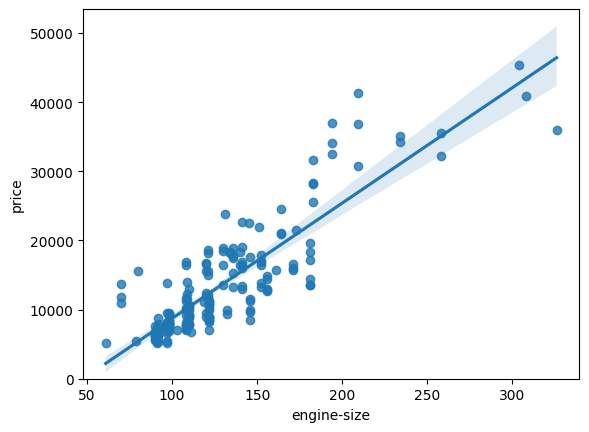

In [19]:
# Scatterplot para "engine-size" e "preco"
# "engine-size" como potencial variavel 'preditora' de 'price'
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

Enquanto engine-size aumenta, preco tambem aumenta,  demonstrando relacionamento positivo. A linha quase perfeita na diagonal tambem eh um sinal 

In [20]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


### Relacionamento Fraco

<Axes: xlabel='peak-rpm', ylabel='price'>

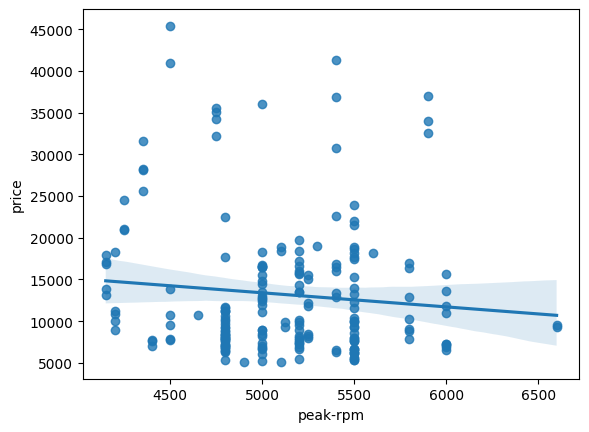

In [21]:
sns.regplot(x="peak-rpm", y="price", data=df)

In [22]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


A variavel 'peak-rpm' nao parece uma boa preditora de preco ja que a linha de regressao eh praticamente horizontal. Alem disso, os pontos estao muito espalhados e longe da "fitted line", demonstrando nao ser confiavel

Outro exemplo de correlacao fraca, com stroke e price
Correlacao           stroke     price
stroke  1.000000  0.082269
price   0.082269  1.000000


<Axes: xlabel='stroke', ylabel='price'>

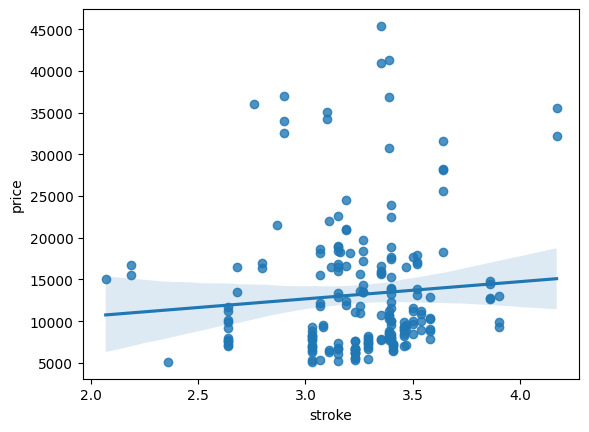

In [23]:
print("Outro exemplo de correlacao fraca, com stroke e price")
print("Correlacao",df[['stroke','price']].corr())
sns.regplot(x="stroke", y="price", data=df)

# Categorical Variables


<Axes: xlabel='body-style', ylabel='price'>

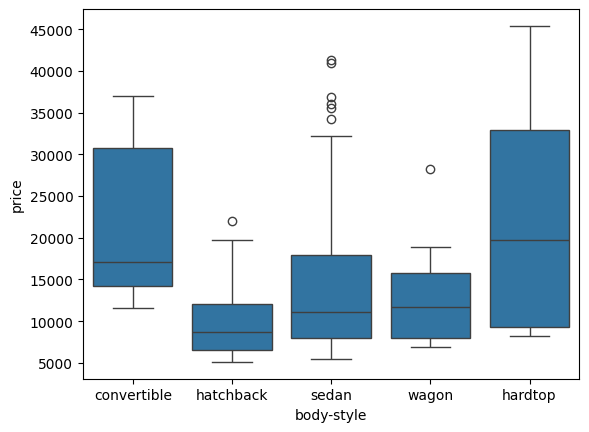

In [24]:
sns.boxplot(x="body-style", y="price", data=df)

O overlap entre as categorias de body-style demonstram nao ser um bom preditor.

<Axes: xlabel='engine-location', ylabel='price'>

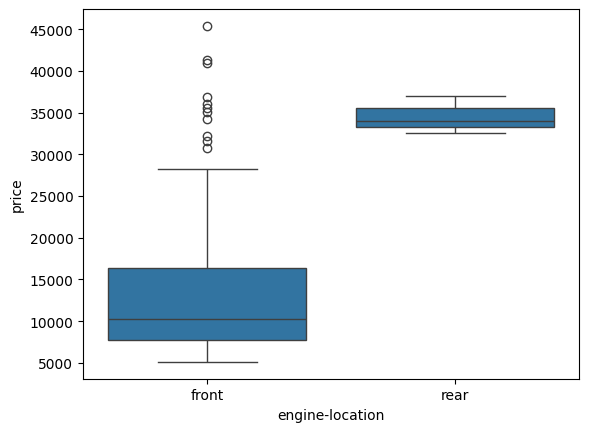

In [25]:
sns.boxplot(x="engine-location", y="price", data=df)

Aqui a distruibuicao de preco entre as duas categorias de engine-location (front e rear), sao distintas suficiente para ter engine-location como um bom preditor de preco.

<Axes: xlabel='drive-wheels', ylabel='price'>

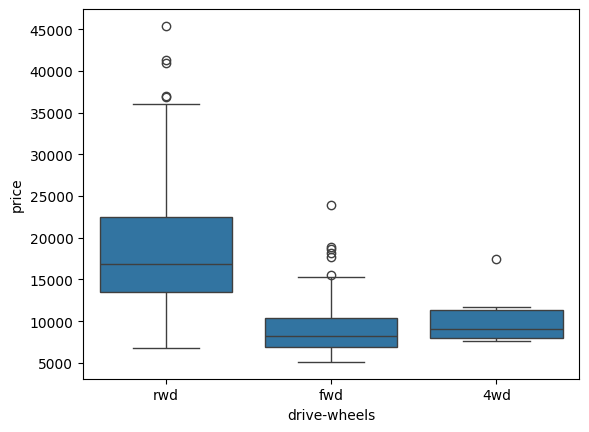

In [26]:
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=df)

No exemplo acima, tambem demonstra que as diferentes categorias de drive-wheels diferem. Demonstrando ser um bom preditor de 'price'